# Código de experimento de NLTK Sentiment Analyzer #

## Instalando los pip necesarios ##

In [8]:
pip install google-api-python-client

Note: you may need to restart the kernel to use updated packages.


## Extrajendo todos los comentarios principales de una Playlist de Youtuve con un máximo de 2,000 ##

In [30]:
import googleapiclient.discovery
import pandas as pd

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = "INSERTE_SU_KEY_AQUI"

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

playlist_id = "INSERTE_ID_PLAYLIST"
max_comments = 2000 #Puede cambiarlo a otro valor.

comments = []
total_comments = 0
next_page_token = None

# Función para extraer los videos de una playlist.
def get_videos_from_playlist(playlist_id):
    videos = []
    next_page_token = None
    while True:
        request = youtube.playlistItems().list(
            part="snippet",
            playlistId=playlist_id,
            maxResults=50,
            pageToken=next_page_token
        )
        response = request.execute()
        for item in response['items']:
            video_id = item['snippet']['resourceId']['videoId']
            videos.append(video_id)
        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break
    return videos

# Función para obtener los comentarios de un video.
def get_comments_from_video(video_id, max_comments, total_comments):
    next_page_token = None
    video_comments = []
    while total_comments < max_comments:
        request = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=100,
            pageToken=next_page_token
        )
        response = request.execute()
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            video_comments.append([
                comment['authorDisplayName'],
                comment['publishedAt'],
                comment['updatedAt'],
                comment['likeCount'],
                comment['textDisplay']
            ])
            total_comments += 1
            if total_comments >= max_comments:
                break
        if total_comments >= max_comments:
            break
        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break
    return video_comments, total_comments

# Extraer todos los videos de la playlist.
videos = get_videos_from_playlist(playlist_id)

# Hacer una iteración con todos los videos extraidos de la playlist.
for video_id in videos:
    video_comments, total_comments = get_comments_from_video(video_id, max_comments, total_comments)
    comments.extend(video_comments)
    if total_comments >= max_comments:
        break

df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])
print(df.head(10))


              author          published_at            updated_at  like_count  \
0         @Ffokcufod  2024-05-27T19:36:04Z  2024-05-27T19:36:04Z           0   
1  @KarenSimon-se3ez  2024-05-27T19:34:45Z  2024-05-27T19:34:45Z           1   
2  @tinaferrebee9070  2024-05-27T19:30:30Z  2024-05-27T19:30:30Z           0   
3        @chevysaab1  2024-05-27T19:27:14Z  2024-05-27T19:27:14Z           0   
4         @klacy5555  2024-05-27T19:17:53Z  2024-05-27T19:17:53Z           0   
5   @susandecker6351  2024-05-27T19:14:09Z  2024-05-27T19:14:09Z           0   
6       @enduser6764  2024-05-27T19:13:40Z  2024-05-27T19:13:40Z           0   
7   @cloutfisher7714  2024-05-27T19:04:34Z  2024-05-27T19:04:34Z           0   
8  @billybutcher5968  2024-05-27T18:58:08Z  2024-05-27T18:58:08Z           0   
9  @hamishfenton8633  2024-05-27T18:57:22Z  2024-05-27T18:57:22Z           0   

                                                text  
0                        Traitor trump needs dumped.  
1  Love T

## Guardando los datos en un CSV ##

In [31]:
# Exporta todos los datos obtenidos a un archivo CSV.
csv_file = 'TrumpNow.csv'  # Nombre dela archivo.
df.to_csv(csv_file, index=False)

## Lectura de sentimientos con nltk.sentiment.vader ##

In [5]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Carlos
[nltk_data]     Rivas\AppData\Roaming\nltk_data...


True

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
sid = SentimentIntensityAnalyzer()
df = pd.read_csv("TrumpOld.csv")
df["sentimiento"] = df["text"].apply(lambda i: sid.polarity_scores(i)['compound'])
df.to_csv("TrumpOldSent.csv")

## Graficos de muestreo ##

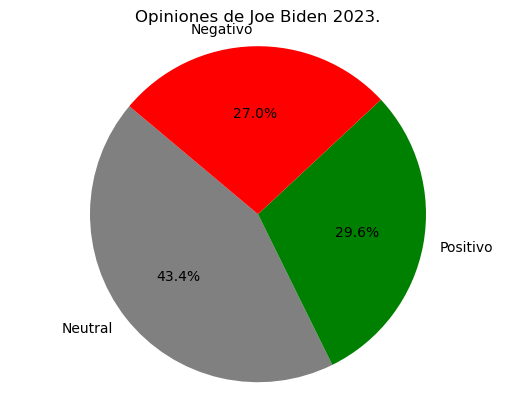

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
# Reemplaza 'archivo.csv' con la ruta a tu archivo
df = pd.read_csv('JoeOldSent.csv')

# Filtrar la columna 'sentimiento'
sentimientos = df['sentimiento']

# Clasificar los sentimientos en los grupos especificados
def clasificar_sentimiento(valor):
    if valor < 0:
        return 'Negativo'
    elif valor == 0 :
        return 'Neutral'
    else:
        return 'Positivo'

df['grupo'] = sentimientos.apply(clasificar_sentimiento)

# Contar la cantidad de valores en cada grupo
conteo_grupos = df['grupo'].value_counts(normalize=True) * 100

# Crear el gráfico de pastel
colores = ['gray', 'green', 'red']
plt.pie(conteo_grupos, labels=conteo_grupos.index, colors=colores, autopct='%1.1f%%', startangle=140)

# Personalizar el gráfico
plt.title('Opiniones de Joe Biden 2023.')
plt.axis('equal')  # Para asegurar que el gráfico de pastel sea circular

# Mostrar el gráfico
plt.show()


## Fin del código ##